<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/1.g.%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
پیشبینی قیمت خانه های بوستون (رگرسیون):


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
2.6016254395785847e-15
0.9999999999999993


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 554.2061
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 569.5307 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 566.7569
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 534.8212 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 526.8258
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 529.8115
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 533.1146 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 546.4587
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 517.5773
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 501.1326 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 517.9285 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 518.4209
Epoch 13/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 493.7836 
Epoch 14/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 490.4880
Epoch 15/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

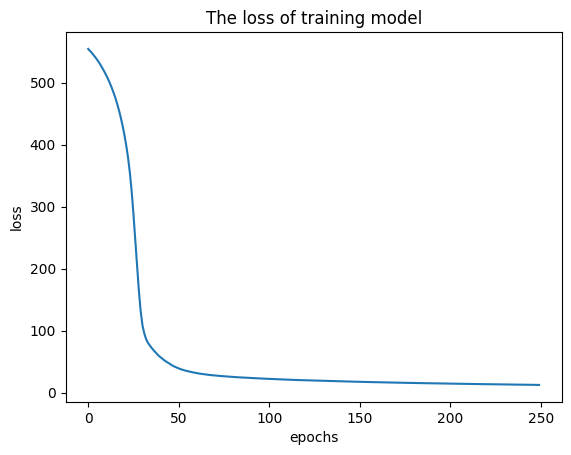

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.1295  
20.66266632080078


In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adadelta


(x_train,y_train), (x_test,y_test) = boston_housing.load_data()

### Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(np.mean(x_train))
print(np.std(x_train))
x_test = sc.transform(x_test)

Model = Sequential()
Model.add(Dense(10, input_dim=13))
Model.add(Activation('relu'))
Model.add(Dense(5))
Model.add(Activation('relu'))
Model.add(Dense(1))

Model.compile(loss='mse',
              optimizer= Adadelta(learning_rate=0.4))

history = Model.fit(x_train, y_train, epochs=250,
          batch_size = 64)
a = history.history
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

predictions = Model.predict(x_test)
Loss = Model.evaluate(x_test, y_test)
print(Loss)

In [18]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [16]:
predictions

array([[ 6.7477307],
       [18.798464 ],
       [21.491135 ],
       [28.724192 ],
       [25.264238 ],
       [21.230246 ],
       [25.319376 ],
       [21.422075 ],
       [20.126455 ],
       [21.003805 ],
       [18.182423 ],
       [15.148281 ],
       [17.366993 ],
       [42.95027  ],
       [18.43802  ],
       [18.701014 ],
       [27.179659 ],
       [21.381287 ],
       [17.825966 ],
       [30.407198 ],
       [10.8740835],
       [16.25449  ],
       [20.006977 ],
       [11.869266 ],
       [24.34975  ],
       [22.012175 ],
       [31.4709   ],
       [30.019653 ],
       [11.579709 ],
       [19.89925  ],
       [21.773558 ],
       [13.695865 ],
       [36.059074 ],
       [25.434317 ],
       [17.479767 ],
       [ 9.305564 ],
       [16.653662 ],
       [19.637983 ],
       [20.631283 ],
       [27.7612   ],
       [29.06076  ],
       [29.728546 ],
       [14.9169655],
       [41.14812  ],
       [29.52822  ],
       [25.637533 ],
       [27.385448 ],
       [15.75

In [27]:
x_test[3,:]

array([-0.26780504, -0.48361547,  1.24588095,  3.89358447,  0.40670026,
       -0.02409575,  0.84531294, -0.95767141, -0.51114231, -0.01744323,
       -1.71818909, -0.1687668 , -0.99934525])

In [35]:
predictions = Model.predict(x_test[3,:].reshape(1, -1))
print("Prediction:", predictions[0][0])
print("Actual value:", y_test[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: 28.724197
Actual value: 27.0


In [40]:
predictions = Model.predict(np.array([-0.11780504, -0.52361547,  1.33588095,  2.89358447,  0.90670026,
       -0.02409575,  0.84531294, -0.95767141, -0.51114231, -0.01744323,
       -2.98818909, -0.5587668 , -0.10934525]).reshape(1, -1))
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[21.091705]], dtype=float32)